In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
target = boston.values[1::2, 2]
features = ["CRIM","ZN" ,"INDUS","CHAS","NOX","RM","AGE","DIS","RAD" "TAX","PTRATIO","B","LSTAT"," MEDV"]

In [38]:
len(features), data.shape


(13, (506, 13))

#### Preparing the dataset

In [39]:
df = pd.DataFrame(data, columns = features)
df["target"] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RADTAX,PTRATIO,B,LSTAT,MEDV,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RADTAX   506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12   MEDV    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [41]:
# check for null values
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RADTAX     0
PTRATIO    0
B          0
LSTAT      0
 MEDV      0
target     0
dtype: int64

In [42]:
# summarize the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RADTAX,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
PTRATIO,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


1. No missing values are present in the dataset

In [43]:
# EDA Part
# check for correlation
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RADTAX,PTRATIO,B,LSTAT,MEDV,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RADTAX,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
PTRATIO,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [44]:
# sns.pairplot(df)

Text(0, 0.5, 'price')

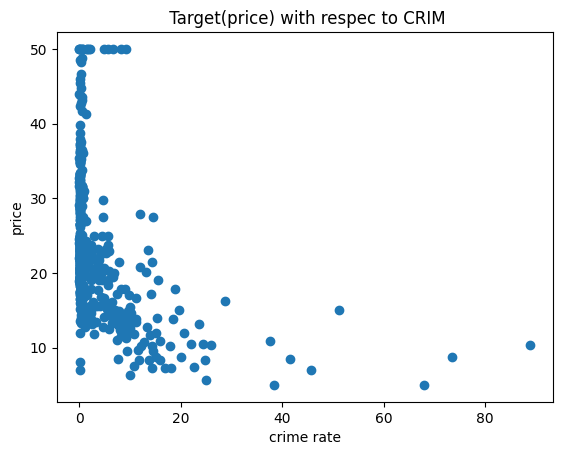

In [45]:
# CRIM and target correlation
plt.scatter(df["CRIM"], df["target"])
plt.title(" Target(price) with respec to CRIM")
plt.xlabel("crime rate")
plt.ylabel("price")
# price is negatively correlated to crime rate, 
# as the crime rate increases, price decreases 

Text(0, 0.5, 'price')

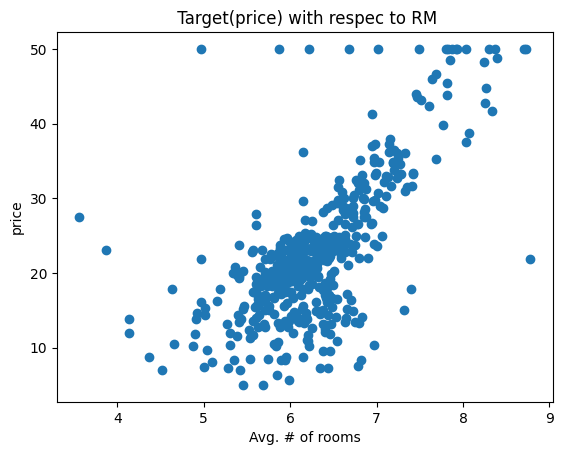

In [46]:
# RM(avg # of room) and target correlation
plt.scatter(df["RM"], df["target"])
plt.title(" Target(price) with respec to RM")
plt.xlabel("Avg. # of rooms")
plt.ylabel("price")
# price is positively correlated to RM, 
# as the cavg # of roooms increases, price increases 

<AxesSubplot: xlabel='RM', ylabel='target'>

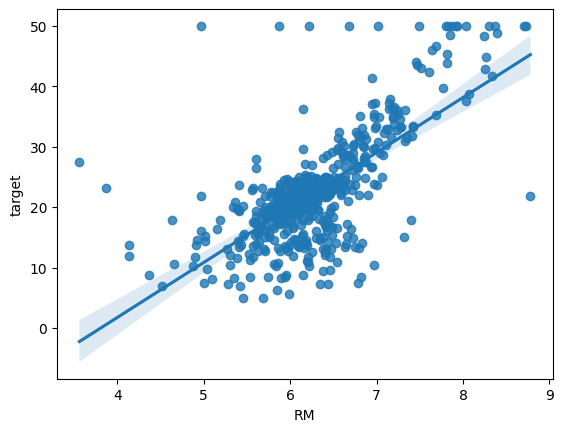

In [47]:
# regression plot drwas a line between two variables
sns.regplot(x ="RM", y="target", data=df)
# shows +ve correlation between RM and target

<AxesSubplot: xlabel='LSTAT', ylabel='target'>

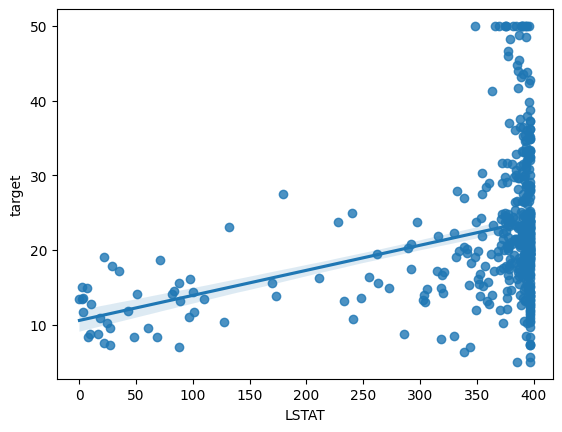

In [48]:
# regression plot drwas a line between two variables
sns.regplot(x ="LSTAT", y="target", data=df)
# shows negative correlaation between LSTAT and price

<AxesSubplot: xlabel='PTRATIO', ylabel='target'>

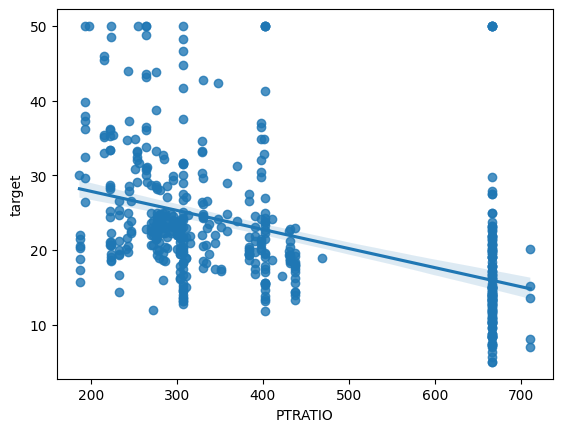

In [49]:
# regression plot drwas a line between two variables
sns.regplot(x ="PTRATIO", y="target", data=df)
# as PTRATIO increase, price decreases

In [50]:
# split dataset
x = df.iloc[:,:-1]
y = df["target"]
x.head(), y.head()

(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RADTAX  PTRATIO  \
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900     1.0    296.0   
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671     2.0    242.0   
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671     2.0    242.0   
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622     3.0    222.0   
 4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622     3.0    222.0   
 
       B   LSTAT   MEDV  
 0  15.3  396.90   4.98  
 1  17.8  396.90   9.14  
 2  17.8  392.83   4.03  
 3  18.7  394.63   2.94  
 4  18.7  396.90   5.33  ,
 0    24.0
 1    21.6
 2    34.7
 3    33.4
 4    36.2
 Name: target, dtype: float64)

In [51]:

from sklearn.model_selection import train_test_split

In [52]:

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.3)
x_train.shape, y_train.shape

((354, 13), (354,))

In [53]:
# standardize dataset
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)
x_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

### Model training

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [56]:
lin_reg.coef_ # for every independent feature,we have a coefficient

array([-1.10834602,  0.80843998,  0.34313466,  0.81386426, -1.79804295,
        2.913858  , -0.29893918, -2.94251148,  2.09419303, -1.44706731,
       -2.05232232,  1.02375187, -3.88579002])

In [57]:
lin_reg.intercept_

23.01581920903955

In [58]:
# on which parameters the model is trained
lin_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [59]:
# prediciton with test data
pred = lin_reg.predict(x_test)
pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

Text(0.5, 1.0, 'predicted vs actual')

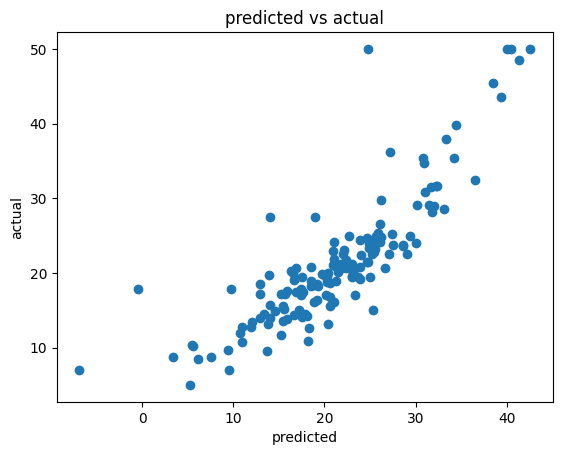

In [60]:
# plot a scatter plot for prediction 
plt.scatter(pred, y_test)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("predicted vs actual")

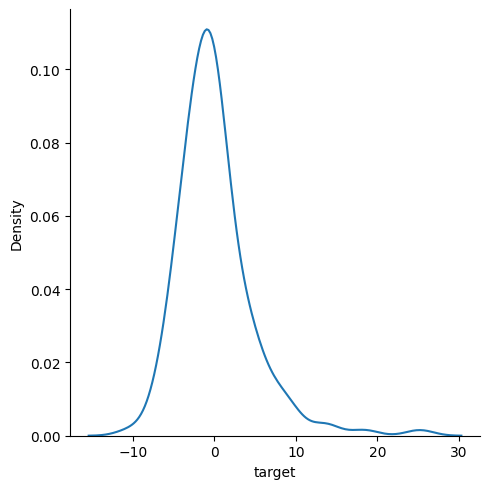

In [61]:
residual = y_test - pred
# plot residuals
sns.displot(residual, kind ="kde")
# residual should have a normal distribution, linear regression assumptions
# we are getting somewhat closer to normal distribution in our model

Text(0.5, 1.0, ' Residual plot with respect to predictions')

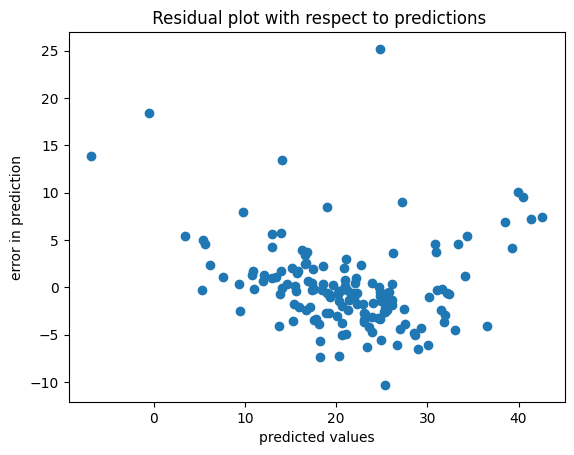

In [62]:
# scatter plot with respect to residuals
plt.scatter(pred, residual)
plt.xlabel("predicted values")
plt.ylabel("error in prediction")
plt.title(" Residual plot with respect to predictions")

In [63]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean squared error: ",mean_squared_error(y_test, pred))
print("Absoluted squared error", mean_absolute_error(y_test, pred))
print("Absoluted squared error",np.sqrt(mean_squared_error(y_test, pred)))

Mean squared error:  21.517444231177215
Absoluted squared error 3.1627098714574053
Absoluted squared error 4.638689926172821


In [64]:
# r2_score >= adjusted_r2_score
r2 = r2_score(y_test, pred)
print("R2 Score: ", r2)
# adjusted_r2_score = 1 - (1 - R2_score)*(n - 1)/(n - k - 1)
print("Adjusted R2 Score: ", 1 - (1 - r2 )*(len(y_test) -1)/(len(y_test) - x_test.shape[1] -1))


R2 Score:  0.7112260057484932
Adjusted R2 Score:  0.6840226584639308


#### New data predictions

In [65]:
# single point prediction
new_sample = data[0].reshape(1,-1) # coverting into 2d
# new_sample
new_sample = std.transform(new_sample)
lin_reg.predict(new_sample)

c:\Users\artig\Documents\End_to_end_projects\boston_house_pricing\venv1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

#### Pickling the model for deployment

In [66]:
import pickle
pickle.dump(lin_reg, open("regression_model.pkl","wb"))
pickle.dump(std, open("std.pkl","wb"))

In [67]:
pickled_model = pickle.load(open("regression_model.pkl","rb"))
pickled_std = pickle.load(open("std.pkl", "rb"))
new_sample1 = pickled_std.transform(data[0].reshape(1,-1))
pickled_model.predict(new_sample1)

c:\Users\artig\Documents\End_to_end_projects\boston_house_pricing\venv1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

In [68]:
df.iloc[0].to_dict()

{'CRIM': 0.00632,
 'ZN': 18.0,
 'INDUS': 2.31,
 'CHAS': 0.0,
 'NOX': 0.538,
 'RM': 6.575,
 'AGE': 65.2,
 'DIS': 4.09,
 'RADTAX': 1.0,
 'PTRATIO': 296.0,
 'B': 15.3,
 'LSTAT': 396.9,
 ' MEDV': 4.98,
 'target': 24.0}

{'CRIM': 0.00632,
 'ZN': 18.0,
 'INDUS': 2.31,
 'CHAS': 0.0,
 'NOX': 0.538,
 'RM': 6.575,
 'AGE': 65.2,
 'DIS': 4.09,
 'RADTAX': 1.0,
 'PTRATIO': 296.0,
 'B': 15.3,
 'LSTAT': 396.9,
 ' MEDV': 4.98,
 'target': 24.0}